# Patient Analysis
This notebook is responsible for analyzing the "patient" survey responses that have been collected from this [survey](https://forms.gle/axv3s55uio7RmGZT6)

## Questions that we want to answer

- We want to know how likely it is that users will use a pickup box for prescriptions based on their age range
    - We want to know if our proposed solution will have a high customer acceptance rate
- We want to know what patients believe is the mean acceptable amount of time to wait to pick up prescriptions
    -  We want to have a benchmark by which we can determine if our solution meets the needs of customers.

Import dependencies

In [291]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci
import pandas as pd
from pathlib import Path
import uuid
from IPython.display import display, HTML

# Some formating options
%config InlineBackend.figure_formats = ['svg']

def disp(df):
    """
    Displays a dataframe as HTML

    Args:
        df (dataframe): Dataframe
    """
    display(HTML(df.to_html()))
    
    


Load patient survery data into dataframe

In [292]:
file_path = "./output/patient-survey-data.csv"
df = pd.read_csv(file_path)

display_all_data = False

if display_all_data:
    disp(df)

## We want to know how likely it is that users will use a pickup box for prescriptions based on their age range

,Under 21,21 - 35,35 - 40,40 - 64,65 +
Very likely,60,425,162,57,3
Somewhat likely,48,430,226,66,7
Likely,44,446,261,84,6
Not very likely,35,198,58,41,2
Never,10,33,10,13,5


Text(0, 0.5, 'liklihood')

<Figure size 432x288 with 0 Axes>

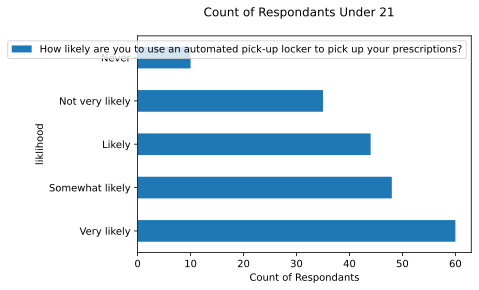

<Figure size 432x288 with 0 Axes>

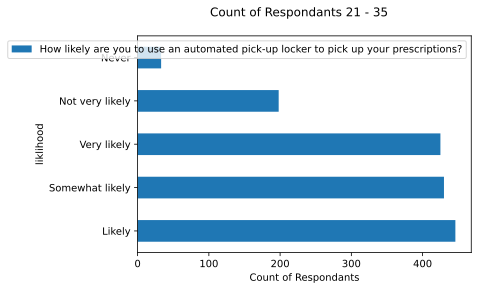

<Figure size 432x288 with 0 Axes>

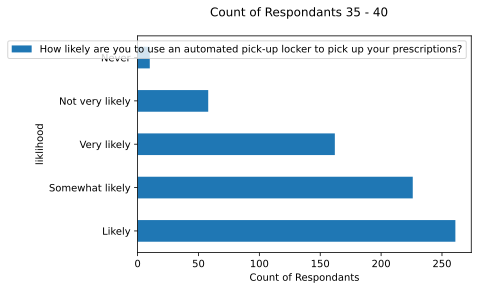

<Figure size 432x288 with 0 Axes>

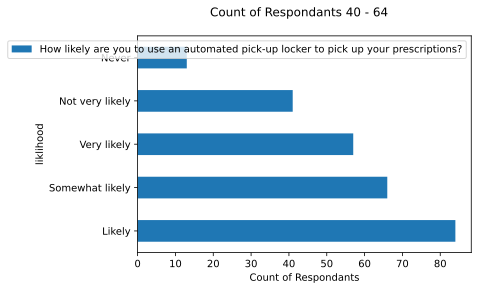

<Figure size 432x288 with 0 Axes>

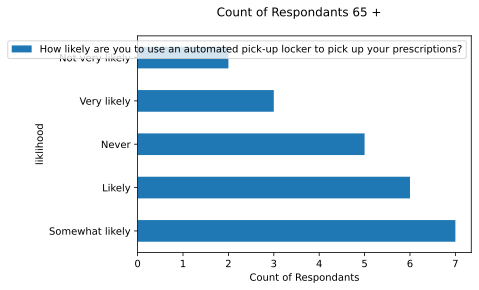

<Figure size 432x288 with 0 Axes>

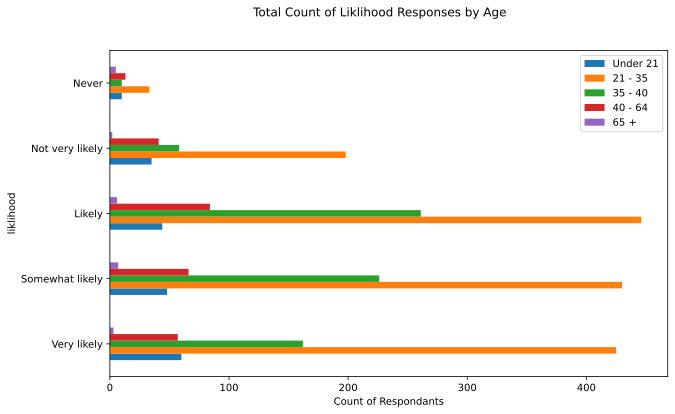

In [293]:
ages = ["Under 21", "21 - 35", "35 - 40", "40 - 64", "65 +"]
col_name = "How likely are you to use an automated pick-up locker to pick up your prescriptions?"

df_counts = pd.DataFrame()

for idx, age in enumerate(ages):
    frame = df.loc[df["What is your age range?"] == age]
    fig = plt.figure()
    counts = frame[col_name].value_counts()
    counts = counts.to_frame()
    counts.plot.barh()
    plt.suptitle(str("Count of Respondants " + age))
    plt.xlabel("Count of Respondants")
    plt.ylabel("liklihood")
    counts.rename(
        columns={col_name: age},
        inplace=True,
    )
    if idx == 0:
        df_counts = counts

    else:
        df_counts[age] = counts[age]
        df_counts.fillna(0)


df_counts = df_counts.fillna(0)
disp(df_counts)
plt.figure()
df_counts.plot.barh(figsize=(10, 6))
plt.suptitle("Total Count of Liklihood Responses by Age")
plt.xlabel("Count of Respondants")
plt.ylabel("liklihood")


,Under 21,21 - 35,35 - 40,40 - 64,65 +,All
Very likely,0.304569,0.277415,0.225941,0.218391,0.130435,0.259151
Somewhat likely,0.243655,0.280679,0.315202,0.252874,0.304348,0.284407
Likely,0.223350,0.291123,0.364017,0.321839,0.260870,0.308199
Not very likely,0.177665,0.129243,0.080893,0.157088,0.086957,0.122255
Never,0.050761,0.021540,0.013947,0.049808,0.217391,0.025988


Text(0, 0.5, 'liklihood')

<Figure size 432x288 with 0 Axes>

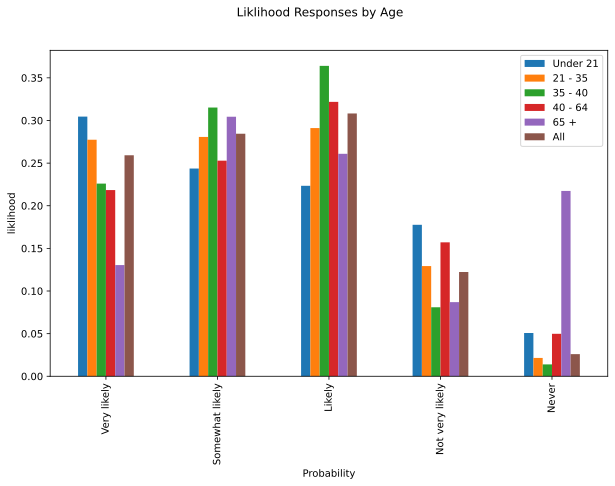

In [294]:
df_probs = df_counts
tot_counts = df[col_name].value_counts()
tot_counts = tot_counts.to_frame()

df_probs["All"] = tot_counts[col_name]

df_probs["All"] = df_probs["All"] / np.sum(df_probs["All"])

for age in ages:
    sum = np.sum(df_probs[age])
    df_probs[age] = df_probs[age] / sum

disp(df_probs)
plt.figure()
ax = df_probs.plot.bar(figsize=(10, 6))
plt.suptitle("Liklihood Responses by Age")
plt.xlabel("Probability")
plt.ylabel("liklihood")

Text(0, 0.5, 'Density')

<Figure size 432x288 with 0 Axes>

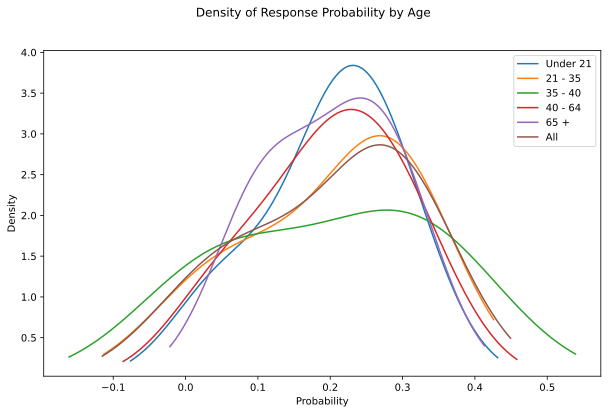

In [295]:
plt.figure()
ax = df_probs.plot.density(figsize=(10,6))
plt.suptitle("Density of Response Probability by Age")
plt.xlabel("Probability")
plt.ylabel("Density")

## We want to know what patients believe is the mean acceptable amount of time to wait to pick up prescriptions

So we can have a benchmark by which we can determine if our solution meets the needs of customers.


Correlate time ranges to numerical values

In [296]:
df_times = pd.DataFrame()
target_ideal = "What do you think is an acceptable amount of time to wait for services at your pharmacy?"
target_true = "How long do you usually wait at the pharmacy?"
min_ideal_wait_times_val = "Min ideal reported wait times"
min_actual_wait_times_val = "Min actual reported wait times"
max_ideal_wait_times_val = "Max ideal reported wait times"
max_actual_wait_times_val = "Max actual reported wait times"
df_times[min_ideal_wait_times_val] = df[target_ideal]
df_times[min_actual_wait_times_val] = df[target_true]
df_times[max_ideal_wait_times_val] = df[target_ideal]
df_times[max_actual_wait_times_val] = df[target_true]
time_ranges = [
    ["0-3 minutes", 0, 3],
    ["4-6 minutes", 4, 6],
    ["7-9 minutes", 7, 9],
    ["11-15 minutes", 11, 15],
    ["more than 15 minutes", 16, 20],
    ["More than 15 minutes", 16, 20],
    [">16 minutes", 16, 20],
]

for range in time_ranges:
    df_times.loc[
        df_times[min_ideal_wait_times_val] == range[0], min_ideal_wait_times_val
    ] = range[1]
    df_times.loc[
        df_times[min_actual_wait_times_val] == range[0], min_actual_wait_times_val
    ] = range[1]
    df_times.loc[
        df_times[max_ideal_wait_times_val] == range[0], max_ideal_wait_times_val
    ] = range[2]
    df_times.loc[
        df_times[max_actual_wait_times_val] == range[0], max_actual_wait_times_val
    ] = range[2]

mean_min_ideal = np.round(np.mean(df_times[min_ideal_wait_times_val]), 3)
mean_min_actual = np.round(np.mean(df_times[min_actual_wait_times_val]), 3)
mean_max_ideal = np.round(np.mean(df_times[max_ideal_wait_times_val]), 3)
mean_max_actual = np.round(np.mean(df_times[max_actual_wait_times_val]), 3)
stddev_mean_min_ideal = np.round(np.std(df_times[min_ideal_wait_times_val]), 3)
diff_min = abs(mean_min_ideal - mean_min_actual)
diff_max = abs(mean_max_ideal - mean_max_actual)


df_mean_times = pd.DataFrame(
    [
        [mean_min_ideal, mean_max_ideal],
        [mean_min_actual, mean_max_actual],
        [diff_min, diff_max],
    ],
    columns=["Mean Minimum (min)", "Mean Max (min)"],
    index=["Ideal Reported Wait Times", "Actual Reported Wait times", "Difference"],
)

Show Table with `min` and `max` desired times

In [297]:
disp(df_mean_times)

,Mean Minimum (min),Mean Max (min)
Ideal Reported Wait Times,6.598,9.198
Actual Reported Wait times,7.767,10.578
Difference,1.169,1.380


Investigate the desity of responses

<AxesSubplot: >

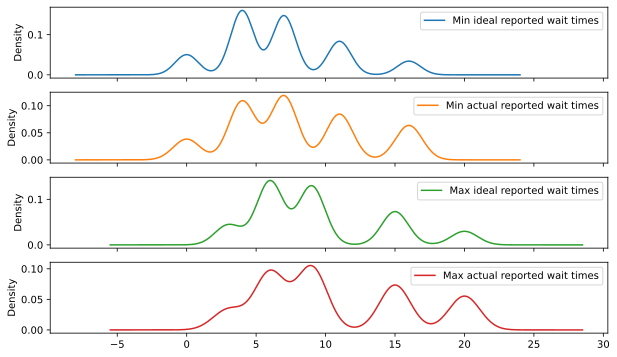

<Figure size 432x288 with 0 Axes>

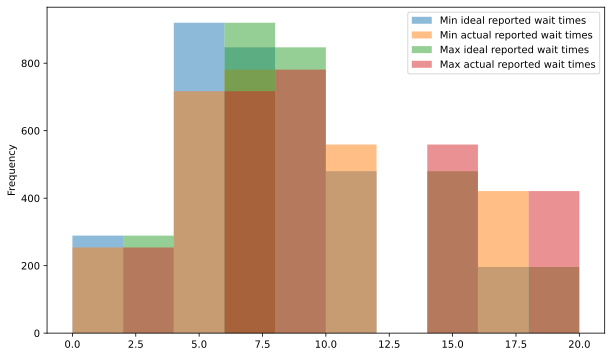

<Figure size 432x288 with 0 Axes>

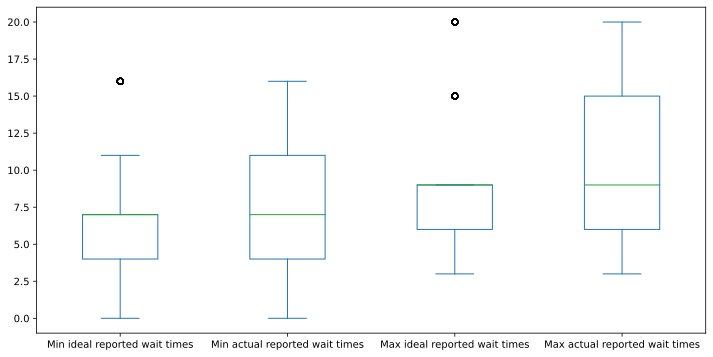

In [314]:
df_times = df_times.astype(int)

df_times.plot.kde(figsize=(10, 6), subplots=True)


plt.figure()
df_times.plot.hist(alpha=0.5, figsize=(10, 6))

plt.figure()
df_times.plot.box(figsize=(12, 6))